# Extract diffrent and changing notes from audio
>In the last tutorial we learned hot recognize the wave in an audio.<br>
But what to do when the notes are changing?<br>
<br>
**This tutorial is about that topic.**

In [1]:
from AudioParamersExtraction import *

In [2]:
sound_array, sr = librosa.load('sounds/John Small.mp3')
sound_array, _ = librosa.effects.trim(sound_array, top_db=10)

>#### When next cell executed, your speaker will start to play the audio.<br>In order to stop - execute the next cell after it

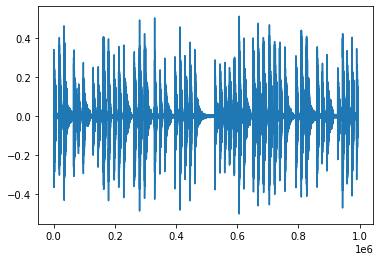

In [3]:
plt.plot(sound_array)

# Play the original audio
sd.play(sound_array, sr)

In [4]:
sd.stop()

## The strategy - moving window
>1. We will split the audio into short segments (window), and analyze each one separately.
>2. Then, we'll extend all the predicted short segments into one audio array

In [5]:
# Length of a sample
N = 1_000
# Starting point of this example
start = 0
# The duration of this sample in seconds
DURATION = N/sr

In [6]:
sounds = []
freqs = []
mags = []
for i in range(0, sound_array.shape[0]-N, N):
    window = sound_array[i:i+N]
    sound_array_pred, predicted_freqs, predicted_mag = predict_wave_freqs_magnitudes(window, sr, DURATION, N)
    
    sounds.append(sound_array_pred)
    freqs.append(predicted_freqs)
    mags.append(predicted_mag)

c:\Users\97250\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [7]:
sounds_append = np.array([])
for s in sounds:
    sounds_append = np.append(sounds_append, s)

Let's hear the result:

In [8]:
sd.play(sounds_append, sr)

In [9]:
sd.stop()

>Well, it sounds ok... but needs improvement.<br>
Let's check out the predicted notes.

In [10]:
last_note = ''
for f, m in zip(freqs, mags):
    mx = m.max()
    max_mag_index = np.where(m == mx)[0][0]
    current_pred_note = get_note_of_freq(f[max_mag_index])
    if last_note != current_pred_note:
        print(current_pred_note, end='\t')
        last_note = current_pred_note

C8	G5	D7	G5	B6	E6	B6	E5	C8	E6	C8	B6	E6	F5	F6	F5	E6	B4	E6	B4	E5	C8	A6	D6	D5	D6	A6	D5	C5	D5	C8	D5	B4	D5	C5	C8	C7	C5	B4	C8	D5	D6	D5	A4	C8	E6	B6	E5	B6	E6	C8	F5	F6	F5	E5	B6	E5	A4	G5	D7	G5	B7	G5	G7	G5	C8	G5	D#5	G5	B4	D#5	C8	G5	B7	D7	G5	C8	E6	B7	B6	E5	C8	E6	B6	E6	E5	E6	C8	F5	F6	F5	A7	E5	C8	D5	D6	D5	A#6	D5	B4	C5	C7	B4	C5	B4	G6	F7	C8	E6	B6	E5	G5	E5	C8	G5	B7	D7	G5	C5	B4	C5	G6	C6	A4	D#5	G4	A4	D#5	G4	D#5	G4	A3	A4	D#5	D5	C8	D5	A6	D5	D#5	C7	D5	D6	D5	B4	C8	D5	C5	D5	C8	D5	A6	B4	E7	C8	E6	B6	E5	C8	F5	E5	C5	C8	E6	B6	E5	C8	B6	B7	E5	B6	C8	E6	B6	E5	B6	C8	E6	B6	B7	B6	E5	B6	C8	E6	B6	E5	C8	F5	F6	F5	E5	E6	C8	G5	C8	B7	C8	D7	B7	G5	D#5	G5	D#5	C8	G5	C8	D7	G5	D7	C8	G5	C8	E6	B6	E5	B6	C8	B6	E6	C8	F5	C7	E5	E6	E5	E6	E5	C5	D5	D#5	D5	D#5	D5	A4	D#5	A4	C5	C7	B4	C5	B4	C8	E6	C8	B6	E5	C8	G5	E5	C8	G5	B7	G5	C5	

>It seems that the frequency with the largest amplitude is not the right way to choose the current note.<br>
I'll go back to it later.
<!---->
#### The next improvment:<br>
1. predict the frequencies of the segment from the center of the last window to the center of the next one.
2. This will be like "glue".<br>
<!---->
This will help in solving the problem of breaking the wave continuity of different segments.

In [11]:
sounds = []
for i in range(int(N/2), sound_array.shape[0]-int(N*1.5), N):
    window = sound_array[i:i+N]
    sound_array_pred, predicted_freqs, predicted_mag = predict_wave_freqs_magnitudes(window, sr, DURATION, N)
    
    sounds.append(sound_array_pred)

In [12]:
sounds_append2 = np.array([])
for s in sounds:
    sounds_append2 = np.append(sounds_append2, s)

##### Since `sounds_append2` is shorter then `sounds_append` in `N`,<br>we'll add zeros before and after it to their shapes will match

In [13]:
half_N_zeros = np.zeros((int(N/2),))
sounds_append2 = np.append(half_N_zeros, sounds_append2)
sounds_append2 = np.append(sounds_append2, half_N_zeros)

sounds_append = sounds_append + sounds_append2

Let's hear the result:

In [14]:
sd.play(sounds_append, sr)

In [15]:
sd.stop()

>#### This sounds match better!<br>I will use this in order to improve the notes prediction.

># NOTE: **This project is still under construction**!